<b>

<p>
<center>
<font size="6">
Mini-Project: Analysing and Predicting Life Expectancy
</font>
</center>
</p>

<p>
<center>
<font size="4">
SC1015: Data Science and Artifial Intelligence, Nanyang Technological University
</font>
</center>
</p>

</b>

<p>
<center>
<font size="3">
<em>Done By: Chan Kit Ho and Chiang Qin Zhi</em>
</font>
</center>
</p>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


# Part 1: Data Cleaning and Preparation

First, we import the dataset from a .csv file into a Pandas DataFrame and explore the dataset.

In [3]:
LifeData = pd.read_csv('Life-Expectancy-Data-Updated.csv')
LifeData

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


The description of the dataset is as available below:  
>**Year** : Year  
>**Status** : Developed or Developing status  
>**Life expectancy** : Life Expectancy in age  
>**Adult Mortality** : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)  
>**infant deaths** : Number of Infant Deaths per 1000 population  
>**Alcohol** : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)  
>**percentage expenditure** : Expenditure on health as a percentage of Gross Domestic Product per capita(%)  
>**Hepatitis B** : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)  
>**Measles** : Measles - number of reported cases per 1000 population  
>**BMI** : Average Body Mass Index of entire population  
>**under-five deaths** : Number of under-five deaths per 1000 population  
>**Polio** : Polio (Pol3) immunization coverage among 1-year-olds (%)  
>**Total expenditure** : General government expenditure on health as a percentage of total government expenditure (%)  
>**Diphtheria** : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)  
>**HIV/AIDS** : Deaths per 1 000 live births HIV/AIDS (0-4 years)  
>**GDP** : Gross Domestic Product per capita (in USD)  
>**Population** : Population of the country  
>**thinness 1-19 years** : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )  
>**thinness 5-9 years** : Prevalence of thinness among children for Age 5 to 9(%)  
>**Income composition of resources** : Human Development Index in terms of income composition of resources (index range from 0 to 1)  
>**Schooling** : Number of years of Schooling(years)  


In [4]:
print("Life Expectancy Dataset Shape:", LifeData.shape, "\n")
print("Life Expectancy Dataset:", LifeData.info, "\n")

Life Expectancy Dataset Shape: (2864, 21) 

Life Expectancy Dataset: <bound method DataFrame.info of         Country          Region  Year  Infant_deaths  Under_five_deaths  \
0       Turkiye     Middle East  2015           11.1               13.0   
1         Spain  European Union  2015            2.7                3.3   
2         India            Asia  2007           51.5               67.9   
3        Guyana   South America  2006           32.8               40.5   
4        Israel     Middle East  2012            3.4                4.3   
...         ...             ...   ...            ...                ...   
2859      Niger          Africa  2000           97.0              224.9   
2860   Mongolia            Asia  2009           23.9               28.6   
2861  Sri Lanka            Asia  2004           17.7               28.9   
2862  Lithuania  European Union  2002            7.9                9.9   
2863    Iceland  Rest of Europe  2011            2.1                2.6   

Definitions of Variables:


We can see that there are multiple null or missing values. As part of the process, we will be removing them and placing them in a new DataFrame.

In [5]:
LifeData_Clean = pd.DataFrame(LifeData) #Duplicating the Dataframe
#LifeData_Clean = LifeData_Clean.dropna()
#ifeData_Clean = LifeData_Clean.loc[(LifeData_Clean != 0).all(axis=1)]

#LifeData_Clean = LifeData_Clean[(LifeData_Clean["Measles "]!= 0) & (LifeData_Clean["Measles "].notna())] # Removing rows with column Measles == 0 or NA.
#LifeData_Clean = LifeData_Clean[(LifeData_Clean["GDP"]!= 0) & (LifeData_Clean["GDP"].notna())] # Removing rows with column GDP == 0 or NA.
#LifeData_Clean = LifeData_Clean[(LifeData_Clean[" HIV/AIDS"]!= 0) & (LifeData_Clean[" HIV/AIDS"].notna())] # Removing rows with column HIV/AIDS == 0 or NA.

#LifeData_Clean.to_csv('LifeData_Clean.csv')

In [6]:
LifeData_Clean


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


Noting that the following variables - Hepatitis B, Polio and Diphtheria reflect the immunization coverage among 1-year-olds (%), we will group these variables into one single variable "Essential Immunization", which reflects the essential immunization coverage among 1-year-olds (%) for simplistic sake.

In [7]:
LifeData_Clean["Essential_Immunization"] = round((LifeData_Clean["Hepatitis_B"] + LifeData_Clean["Polio"] + LifeData_Clean["Diphtheria"] + LifeData_Clean["Measles"]) / 4,1)
# Drop the individual columns for Hepatitis B, Polio, and Diphtheria
LifeData_Clean.drop(["Hepatitis_B", "Polio", "Diphtheria","Measles"], axis=1, inplace=True)
print(LifeData_Clean.head())

   Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption   BMI  Incidents_HIV  GDP_per_capita  \
0         105.8240                 1.32  27.8           0.08           11006   
1          57.9025                10.35  26.0           0.09           25742   
2         201.0765                 1.57  21.2           0.13            1076   
3         222.1965                 5.68  25.3           0.79            4146   
4          57.9510                 2.89  27.0           0.08           33995   

   Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
0           78.53     

In [8]:
LifeData_Clean.head


<bound method NDFrame.head of         Country          Region  Year  Infant_deaths  Under_five_deaths  \
0       Turkiye     Middle East  2015           11.1               13.0   
1         Spain  European Union  2015            2.7                3.3   
2         India            Asia  2007           51.5               67.9   
3        Guyana   South America  2006           32.8               40.5   
4        Israel     Middle East  2012            3.4                4.3   
...         ...             ...   ...            ...                ...   
2859      Niger          Africa  2000           97.0              224.9   
2860   Mongolia            Asia  2009           23.9               28.6   
2861  Sri Lanka            Asia  2004           17.7               28.9   
2862  Lithuania  European Union  2002            7.9                9.9   
2863    Iceland  Rest of Europe  2011            2.1                2.6   

      Adult_mortality  Alcohol_consumption   BMI  Incidents_HIV  \
0 

# Part 2: Exploratory Data Analysis (EDA)

As there too many variables, we can check the correlation of the other predictor variables with the response variable, Life Expectancy, to determine which variables to pick. 

This is because, in later sections, using too many variables will result in overfitting for our linear regression model. Though R^2 will increase by virtue of adding more variables, Adjusted R^2 which accounts for number of predictors will be affected.

In [9]:
LifeData_Clean.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
BMI                            float64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
Essential_Immunization         float64
dtype: object

In [10]:
LifeData_Clean["Infant_deaths"] = LifeData_Clean["Infant_deaths"].astype(float)
LifeData_Clean["Under_five_deaths"] = LifeData_Clean["Under_five_deaths"].astype(float)

In [11]:
sb.set (rc = {'figure.figsize':(12, 6)})
sb.histplot(LifeData_Clean["Life expectancy "], kde = True)

KeyError: 'Life expectancy '

In [ ]:
LifeData_Clean.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Essential Immunization
Year,1.000000,-0.002501,-0.029692,0.014219,-0.152919,0.051003,-0.070602,-0.055215,0.017748,0.015462,-0.144144,0.091984,0.016266,0.081687,0.070472,-0.029279,0.033344,0.017575
Life expectancy,-0.002501,1.000000,-0.702307,-0.125523,0.339934,0.436669,-0.011987,0.605058,-0.153074,0.094215,-0.586232,0.483453,0.017780,-0.399659,-0.399611,0.864348,0.725067,0.400791
Adult Mortality,-0.029692,-0.702307,1.000000,-0.008680,-0.096056,-0.249848,-0.055224,-0.344847,0.011892,-0.026324,0.576758,-0.276079,-0.048740,0.190015,0.210818,-0.506721,-0.382048,-0.214761
infant deaths,0.014219,-0.125523,-0.008680,1.000000,-0.096437,-0.105531,0.512668,-0.255115,0.996776,-0.166836,-0.031159,-0.116206,0.668024,0.504856,0.505224,-0.169008,-0.201424,-0.243667
Alcohol,-0.152919,0.339934,-0.096056,-0.096437,1.000000,0.415806,-0.026480,0.418248,-0.088618,0.227552,0.027075,0.427706,-0.019540,-0.425796,-0.397185,0.563630,0.615412,0.242601
percentage expenditure,0.051003,0.436669,-0.249848,-0.105531,0.415806,1.000000,-0.071561,0.362754,-0.107660,0.186652,-0.099938,0.940507,-0.007595,-0.296896,-0.300491,0.492480,0.510797,0.114682
Measles,-0.070602,-0.011987,-0.055224,0.512668,-0.026480,-0.071561,1.000000,-0.151210,0.496434,-0.124573,-0.037339,-0.073100,0.307627,0.156043,0.148514,-0.056756,-0.088301,-0.085539
BMI,-0.055215,0.605058,-0.344847,-0.255115,0.418248,0.362754,-0.151210,1.000000,-0.264582,0.222941,-0.203159,0.406860,-0.073839,-0.511969,-0.522032,0.695487,0.629257,0.314646
under-five deaths,0.017748,-0.153074,0.011892,0.996776,-0.088618,-0.107660,0.496434,-0.264582,1.000000,-0.164592,-0.018063,-0.119620,0.654803,0.505103,0.504208,-0.189023,-0.215044,-0.263151
Total expenditure,0.015462,0.094215,-0.026324,-0.166836,0.227552,0.186652,-0.124573,0.222941,-0.164592,1.000000,0.080555,0.202771,-0.090854,-0.220614,-0.231430,0.135099,0.242580,0.161749


Heatmap for easier visualisation.

<AxesSubplot:>

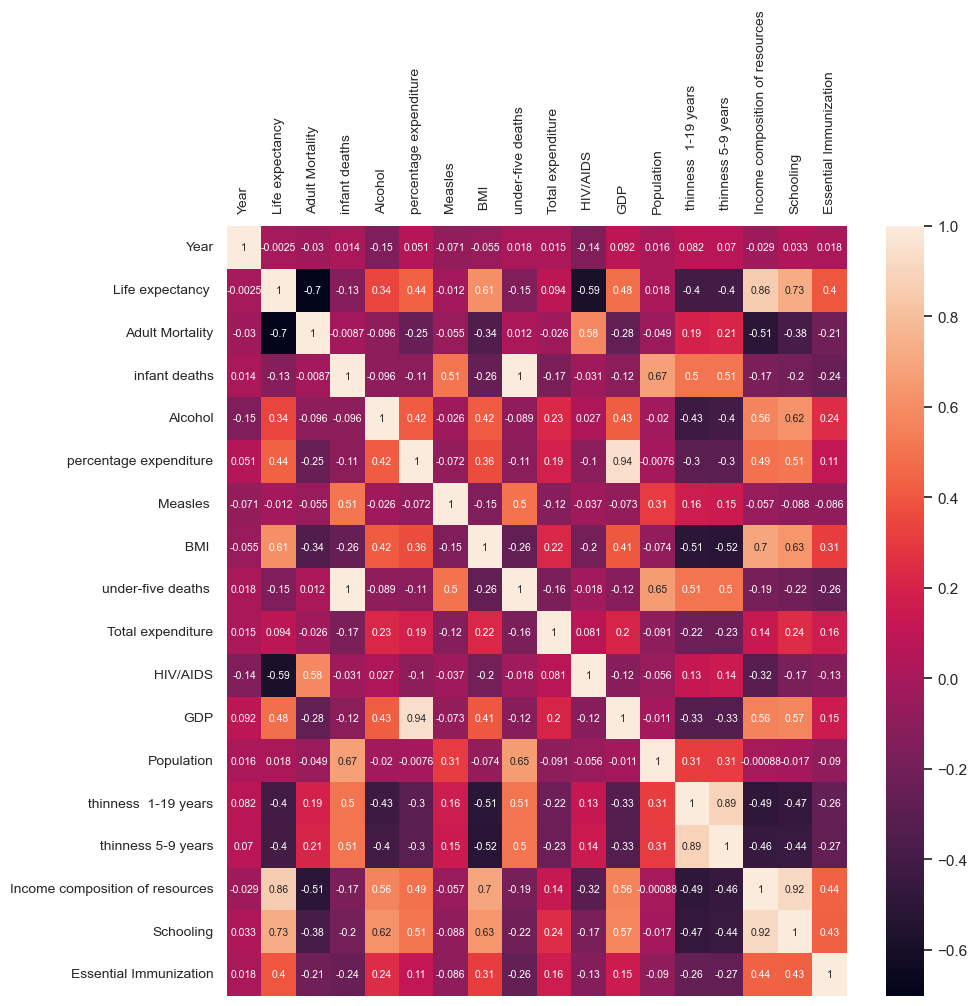

In [ ]:
sns.set (rc = {'figure.figsize':(10, 10)})
plt.tick_params(labelsize=10, labelbottom = False, labeltop=True)
sns.heatmap(LifeData_Clean.corr(), annot = True, annot_kws={"fontsize":7.5})

Looking at heatmap, there is a good relationship (correlation exists) between the best 'GDP' and 'percentage expenditure' and 'Income Composition of Resources' in the Life Expectation data.

Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:  
Adult Mortality (negative)  
HIV/AIDS (negative)  
Income Composition of Resources (positive)  
Schooling (positive)

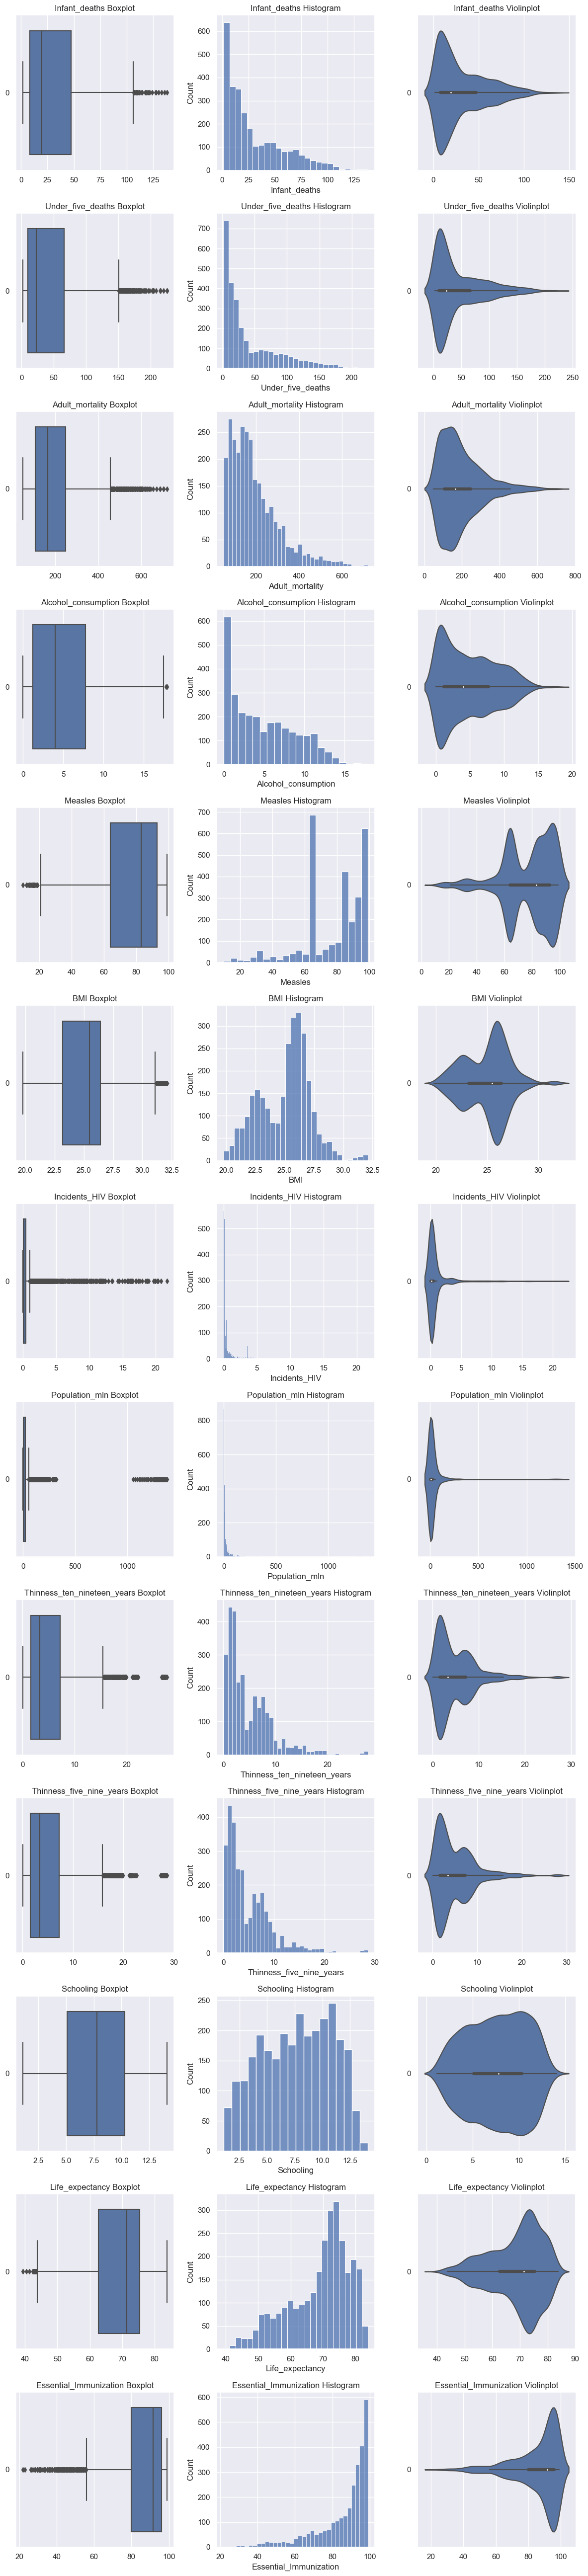

In [ ]:
numeric_data = LifeData_Clean.select_dtypes(include=[float])

# Create a grid of subplots with 3 columns and n rows
n = len(numeric_data.columns)
fig, axes = plt.subplots(nrows=n, ncols=3, figsize=(12, 4*n))

# Loop through each numeric variable and create plots
count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    axes[count,0].set_title(f"{var} Boxplot")
    axes[count,1].set_title(f"{var} Histogram")
    axes[count,2].set_title(f"{var} Violinplot")
    count += 1

plt.tight_layout()
plt.show()

# Part 3: Machine Learning

In this section, we will use machine learning to predict Life Expectancy. First we will use a Multivariate Linear Regression Model, followed by a Classification Tree.

In [13]:
# When we look at the data, Country and Status columns are composed of objects. Because we need to be int or float.
LifeData_Clean.drop(["Country", "Status"], axis=1, inplace=True)

# Independent/Predictor Variables: Last two columns (Income composition of resources, Schooling)
x = LifeData_Clean.iloc[:, [-2,-1]].values

# Dependent/Response Variable:
y = LifeData_Clean["Percentage_Expenditure"].values.reshape(-1,1)            

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 69)
lm = LinearRegression()
linearmodel = lm.fit(x_train, y_train)
print("b0: ", lm.intercept_)
print("b1,b2: ", lm.coef_)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Extract Pokemons for Prediction
pkmndata_pred = pkmndata[pkmndata["Name"].isin(["Charizard", "Snorlax", "Vivillon"])]
pkmndata_pred

KeyError: "['Status'] not found in axis"